In [1]:
import pandas as pd

import numpy as np
np.random.seed(0)

import scikitplot as skplt

import brewer2mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# Wczytywanie danych Credit Card Fraud Detection.

In [3]:
df = pd.read_csv('../ML/creditcard.csv')

In [4]:
# Przegląd pierwszych dziesięciu obiektów.
# Zmienne V1 - V28 mają wartości dodatnie i ujemne, dlatego w dalszej części dane zostaną znormalizowane w zakresie 0-1.

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
# Sprawdzanie liczby obiektów w poszczególnych klasach.
# Zbiór danych jest mocno niezbilansowany 284315:492 - NonFraud:Fraud.

In [7]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

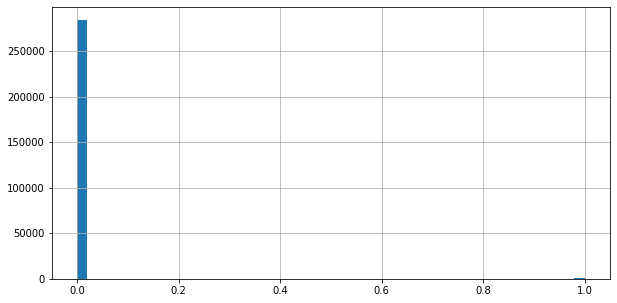

In [9]:
df['Class'].hist(figsize=(10, 5), bins=50);

In [10]:
# Wartość Amount ma niesymetryczny rozkład dlatego zostanie zlogarytmizowana.

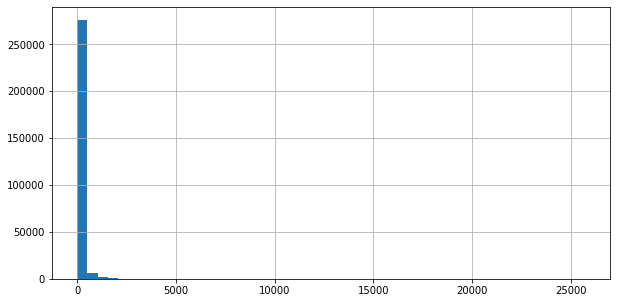

In [11]:
df['Amount'].hist(figsize=(10, 5), bins=50);

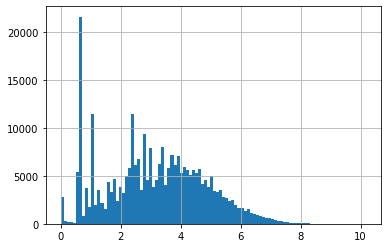

In [12]:
perc99 = np.percentile( df['Amount'], 99)

np.log(df['Amount'] + 1).hist(bins=100);

In [13]:
df['Amount_log'] = np.log(df['Amount']+1)

In [14]:
# Skalowanie zmiennych V1-V28.

In [15]:
black_list = ['Time','Amount', 'Amount_log', 'Class']

In [16]:
feats = list(df.columns.values)
feats = [x for x in feats if x not in black_list]
feats

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [17]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[feats])
scaled_df = pd.DataFrame(scaled_df, columns=feats)

In [18]:
# Stworzenie nowej df i zapisanie do pliku csv.

In [19]:
df.drop(columns=feats, inplace=True)

In [20]:
df = pd.concat([df, scaled_df], axis=1)

In [21]:
df.describe()

,Time,Amount,Class,Amount_log,V1,V2,V3,V4,V5,V6,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727,3.152188,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,...,0.563315,0.580265,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124
std,47488.145955,250.120109,0.041527,1.656648,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,...,0.063570,0.008208,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000,1.887070,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,...,0.527682,0.578011,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049
50%,84692.000000,22.000000,0.000000,3.135494,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,...,0.563606,0.579600,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352
75%,139320.500000,77.165000,0.000000,4.358822,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,...,0.599155,0.581682,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712
max,172792.000000,25691.160000,1.000000,10.153941,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.to_csv('df_new.csv', index=False)